<a href="https://colab.research.google.com/github/MushrooM2027/Stroke_prediction_DT_ML/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data_ML/healthcare-dataset-stroke-data.csv")
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


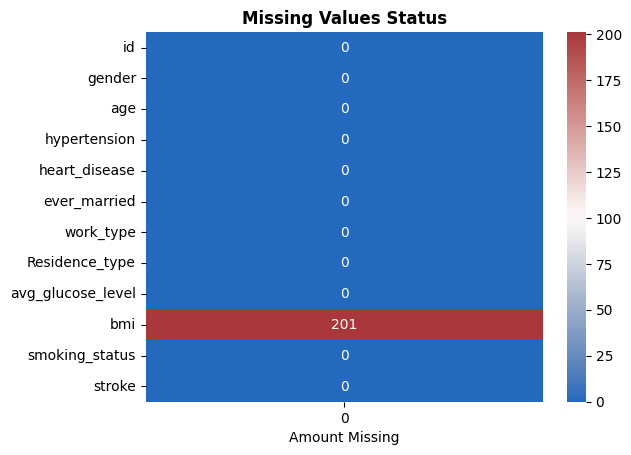

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Missing Values Status", fontweight = "bold")
ax = sns.heatmap(data.isnull().sum().to_frame(), annot = True, fmt = "d", cmap = "vlag")
ax.set_xlabel("Amount Missing")
plt.show()


In [5]:
# check missing data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
mean_bmi = data.groupby('gender')['bmi'].transform('mean')

# Replace the missing values in the 'bmi' column with the mean BMI of the corresponding 'gender_age' group
data.loc[data['bmi'].isnull(), 'bmi'] = mean_bmi

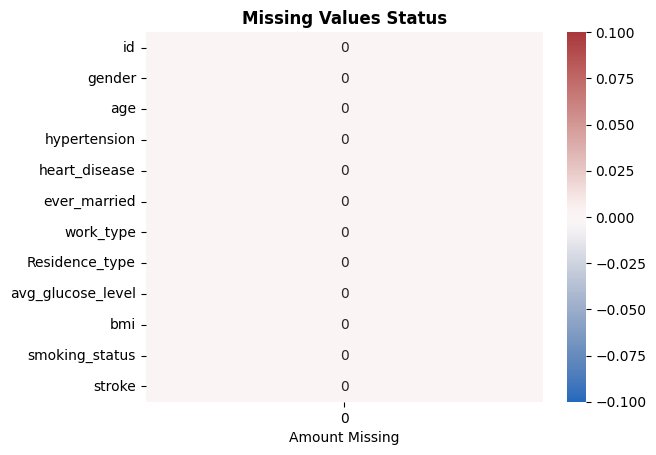

In [7]:
plt.title("Missing Values Status", fontweight = "bold")
ax = sns.heatmap(data.isnull().sum().to_frame(), annot = True, fmt = "d", cmap = "vlag")
ax.set_xlabel("Amount Missing")
plt.show()

Accuracy: 0.9029733959311425
Precision: 0.09210526315789473
Recall 0.11290322580645161
F1-score: 0.10144927536231883
Cohen's Kappa: 0.05072481130945261
MCC: 0.051018676889320116


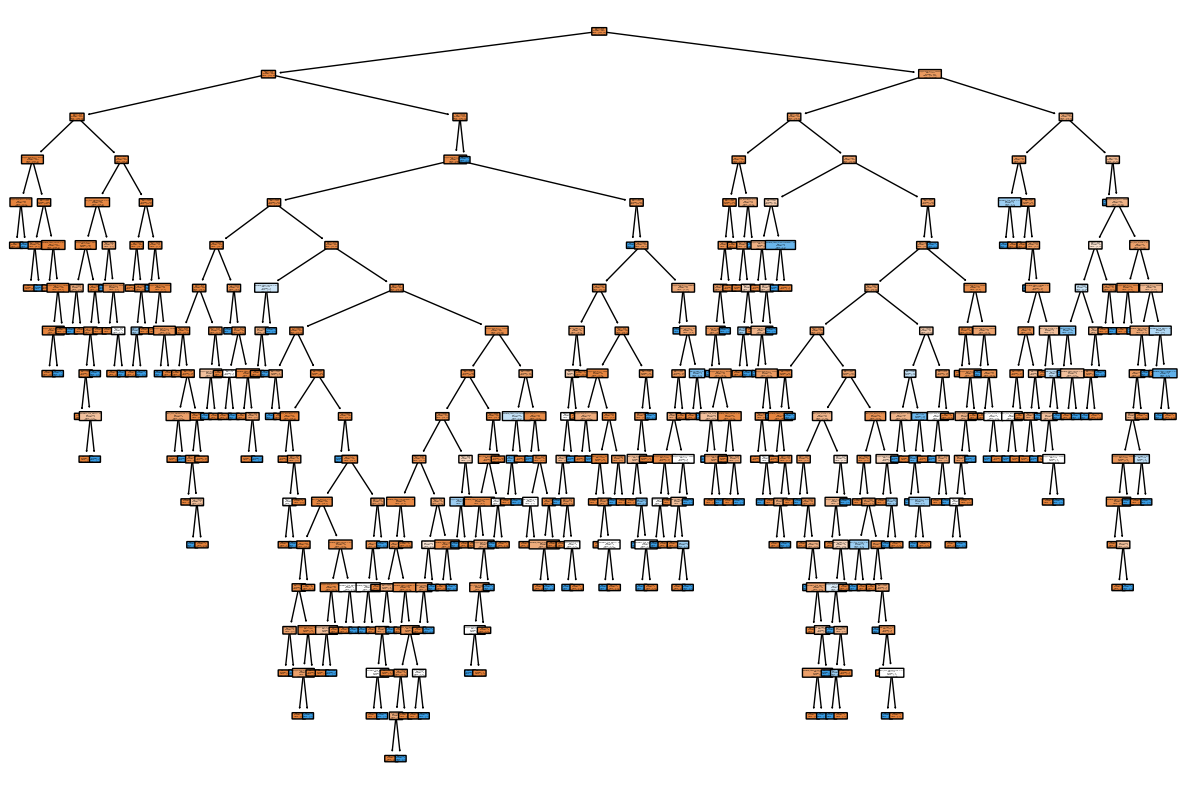

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score,f1_score,cohen_kappa_score,matthews_corrcoef
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = data.drop('stroke', axis=1)  # Features
Y = data['stroke']  # Target variable

X = pd.get_dummies(X, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

accuracy = model.score(X_test, Y_test)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
kappa = cohen_kappa_score(Y_test, predictions)
mcc = matthews_corrcoef(Y_test, predictions)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall', recall)
print('F1-score:', f1)
print('Cohen\'s Kappa:', kappa)
print('MCC:', mcc)


# plt.figure(figsize=(15, 10))
# plot_tree(model, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
# plt.show()
